In [1]:
import sys 
from pyspark import SparkContext, SparkConf 

In [2]:
sc = SparkContext.getOrCreate()

In [3]:
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [4]:
from pyspark.sql import SQLContext
from pyspark.sql.types import * 
sqlCtx = SQLContext(sc)
sqlCtx

In [5]:
from pyspark.sql.functions import col, avg

In [6]:
import pandas as pd
from pandas import DataFrame
from pandas import Series
import numpy as np
from pandas.plotting import scatter_matrix
from pyspark.ml.feature import VectorAssembler
from numpy import polyfit

In [7]:
from pandas import Series
import pandas as pd
import seaborn as sns; sns.set()
from matplotlib import pyplot
import matplotlib.pylab as plt
from statsmodels.tsa.stattools import adfuller

In [8]:
from pyspark.mllib.stat import Statistics

In [9]:
data = sc.textFile("PostcodeHouseprice.csv")

In [10]:
def ParselineForDataOnly2018(line):
    try:
        fields = line.split(',')
        PostCode = fields[0]
        Year = int(fields[1])
        Month = fields[2]
        Number_of_burglaries = int(fields[3])
        Price = float(fields[4])
        if Year == 2018:
            return (PostCode, Year, Month, Number_of_burglaries, Price)
    except Exception as e:
        print("Overall load failed for parsing data", e)   

In [11]:
header = data.first()

In [12]:
data_rdd= data.filter(lambda row: row != header).map(ParselineForDataOnly2018).filter(lambda row: row != None)

In [13]:
df_postcode_mean_price = sqlCtx.createDataFrame(data_rdd,['PostCode','Year','Month','Number_of_burglaries','Price'])

In [14]:
df_affluance = df_postcode_mean_price.select('PostCode','Number_of_burglaries','Price').groupBy('PostCode').agg({'Price':'avg', 'Number_of_burglaries':'sum'}).sort('avg(Price)', ascending = False).sort('sum(Number_of_burglaries)', ascending = False)

In [15]:
pdf_affluance = df_affluance.toPandas()

In [16]:
pdf_affluance
#Table showing affluance of postcodes by their mean house sale price in 2018

,PostCode,avg(Price),sum(Number_of_burglaries)
0,BS22 9UD,4.175000e+05,2095
1,BS8 3PD,9.885800e+05,522
2,BS23 2ER,8.000000e+04,402
3,HU5 4AD,1.232500e+05,396
4,CH3 6PR,4.600000e+05,215
5,BS15 3AW,2.525000e+05,168
6,CH4 9EY,3.300000e+05,163
7,BS14 0PE,3.450000e+05,131
8,CH48 0QG,3.550000e+05,101
9,HU11 4AB,2.700000e+05,88


In [17]:
pdf_affluance['categories'] = pd.cut(np.array(pdf_affluance['sum(Number_of_burglaries)']),[0,10,50,100,500,2500])

Text(0, 0.5, 'Number of burglaries')

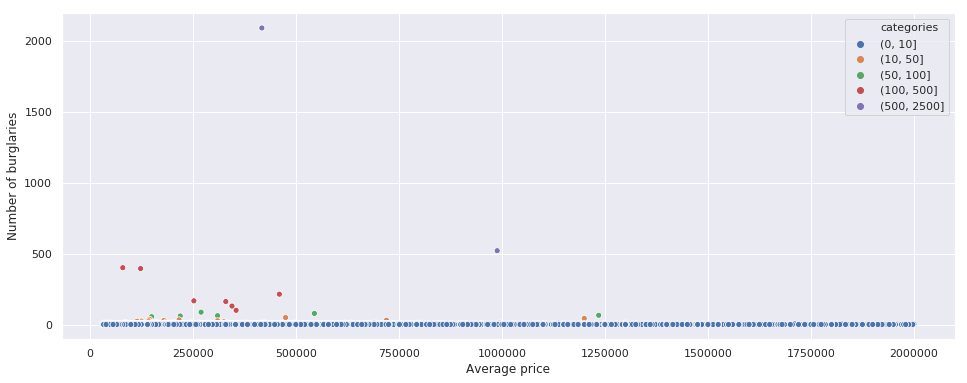

In [18]:
plt.figure(figsize=(16, 6))
x = sns.scatterplot(x='avg(Price)',y='sum(Number_of_burglaries)', hue='categories', data=pdf_affluance)
plt.xlabel("Average price")
plt.ylabel("Number of burglaries")
#Graph for number of burglaries  and average price for all postcodes in 2018

In [19]:
sevenMonthPostcodes = df_postcode_mean_price.select('PostCode','Number_of_burglaries','Price','Month').groupBy('PostCode').agg({'Price':'avg', 'Number_of_burglaries':'sum', 'Month':'count'}).sort('avg(Price)', ascending = False).sort('sum(Number_of_burglaries)', ascending = False)

In [20]:
clean_data = sevenMonthPostcodes[sevenMonthPostcodes['count(Month)']==7]

In [21]:
#clean_data.show()
#This is used to clean the data only to show postcodes that have all the 7 months in 2018

In [22]:
pdf_clean_data = clean_data.toPandas()

In [23]:
pdf_clean_data['categories'] = pd.cut(np.array(pdf_clean_data['sum(Number_of_burglaries)']),[0,10,50,100,500,2500])

Text(0, 0.5, 'Number of burglaries')

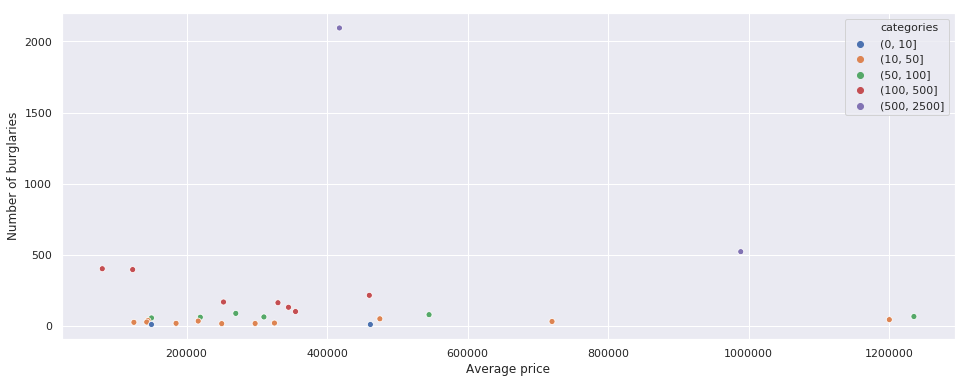

In [24]:
plt.figure(figsize=(16, 6))
x = sns.scatterplot(x='avg(Price)',y='sum(Number_of_burglaries)', hue='categories', data=pdf_clean_data)
plt.xlabel("Average price")
plt.ylabel("Number of burglaries")
#Graph for number of burglaries  and average price for all postcodes with all the 7 months in 2018

In [25]:
#In this section I am cuting and ploting data to determin which postcodes have increasing burglaries

In [26]:
data_for_increase_bur = pd.read_csv("PostcodeHouseprice.csv", header=0, index_col='PostCode')

In [27]:
data_for_increase_bur_2018 = data_for_increase_bur[data_for_increase_bur.Year == 2018]

In [28]:
groupByPostcode = data_for_increase_bur_2018.groupby([data_for_increase_bur_2018.index.name,'Year']).agg({'number_of_burglaries': 'sum', 'Month':'count'})

In [29]:
clean_months = groupByPostcode[groupByPostcode.Month == 7]

In [30]:
clean_months=clean_months.reset_index(level = 'PostCode')

In [31]:
clean_months=clean_months.reset_index(level = 'Year')

In [32]:
check_postcodes = clean_months['PostCode'].to_numpy()

In [33]:
data_for_increase_bur_2018 = data_for_increase_bur_2018.reset_index(level = 'PostCode')

In [34]:
finall_data=data_for_increase_bur_2018[data_for_increase_bur_2018.PostCode.isin(check_postcodes)]

In [35]:
cut_data = finall_data.groupby(['PostCode']).agg({'number_of_burglaries': 'sum'}).sort_values(by='number_of_burglaries', ascending=False)

In [36]:
cut_data=cut_data.reset_index(level = 'PostCode')

In [37]:
highest_ten_postcodes = cut_data.head(10)

In [38]:
highest_ten_postcodes = highest_ten_postcodes['PostCode'].to_numpy()

In [39]:
finall_data=data_for_increase_bur_2018[data_for_increase_bur_2018.PostCode.isin(highest_ten_postcodes)]

In [40]:
finall_data = finall_data.groupby(['Month','PostCode']).agg({'number_of_burglaries': 'sum'})

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0eb34d8dd8>,
      dtype=object)

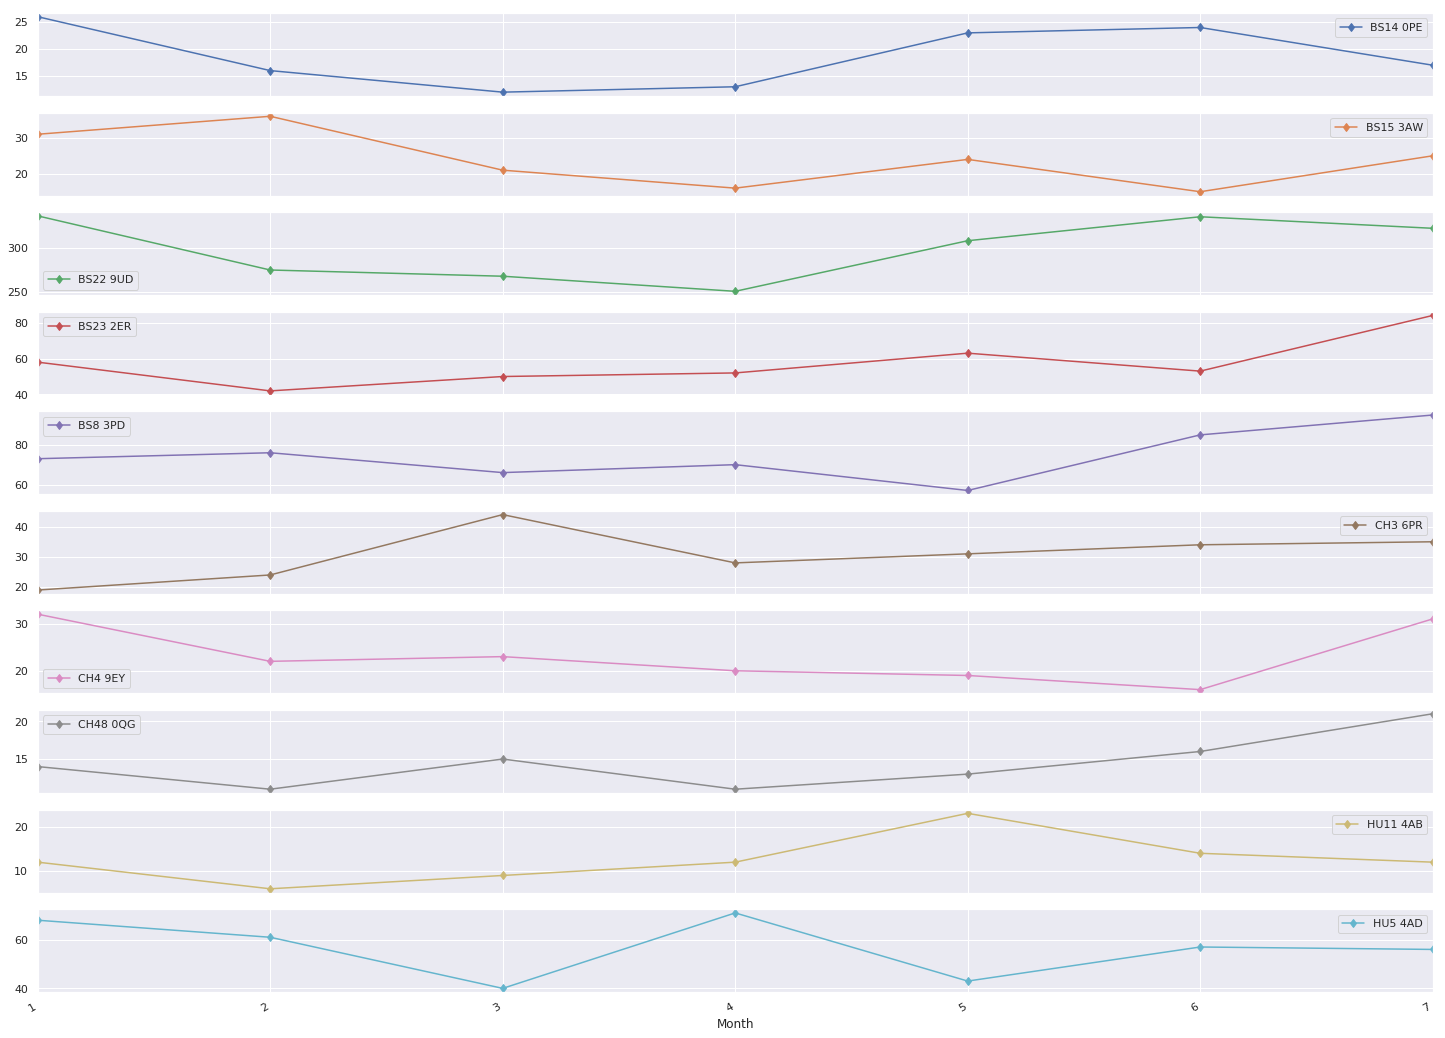

In [41]:

finall_data.groupby(['Month','PostCode']).sum()['number_of_burglaries'].unstack().plot(subplots=True, marker='d',  legend=True ,figsize=[25,20])


In [42]:
#Correlation is done in this section to determine is there relationship between number of burglaries and average price

In [43]:
data_correlation_rdd = data.filter(lambda row: row != header).map(ParselineForDataOnly2018).filter(lambda row: row != None)

In [44]:
vectors = data_correlation_rdd.map(lambda v: np.array(v))

In [45]:
price = vectors.map(lambda v: v[4])
burglaries = vectors.map(lambda v: v[3])

In [46]:
correlationPearson = Statistics.corr(burglaries,price,"pearson")
print("price to burglaries : Pearson Correlation = %2.4f" % correlationPearson)

price to burglaries : Pearson Correlation = 0.0123


In [47]:
correlationSpearman = Statistics.corr(price,burglaries,"spearman")
print("price to burglaries : Spearman Correlation = %2.4f" % correlationSpearman)

price to burglaries : Spearman Correlation = 0.0107


In [48]:
#ARIMA model is made in this section to try to make prediction based on number of burglaries in each month of 2016 to 2018

In [49]:
#Source code for arima model --> https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

In [50]:
from statsmodels.tsa.arima_model import ARIMA

In [51]:
data_all_Year = pd.read_csv("PostcodeHouseprice.csv", header=0,parse_dates=[[1,2]], index_col=[0])

In [52]:
MontlyBurglary = data_all_Year.groupby([data_all_Year.index.name])['number_of_burglaries'].sum()

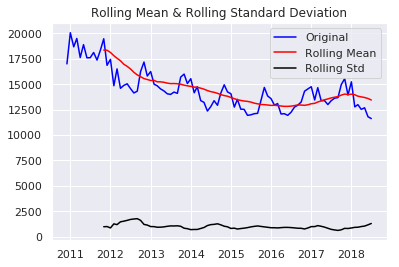

In [53]:
rolling_mean = MontlyBurglary.rolling(window = 12).mean()
rolling_std = MontlyBurglary.rolling(window = 12).std()
plt.plot(MontlyBurglary, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [54]:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(MontlyBurglary, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -3.589798
p-value                         0.005959
#Lags Used                     12.000000
Number of Observations Used    79.000000
Critical Value (1%)            -3.515977
Critical Value (5%)            -2.898886
Critical Value (10%)           -2.586694
dtype: float64


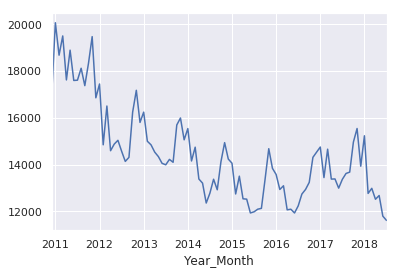

In [55]:
MontlyBurglary.plot()
pyplot.show()
#This is an overall view on number of burglaries through all the years

In [56]:
data = MontlyBurglary.to_frame()

In [57]:
model = ARIMA(data.values, order=(1,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   92
Model:                     ARMA(1, 1)   Log Likelihood                -760.913
Method:                       css-mle   S.D. of innovations            936.666
Date:                Mon, 20 Jan 2020   AIC                           1529.825
Time:                        13:01:19   BIC                           1539.912
Sample:                             0   HQIC                          1533.896
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.458e+04   1148.061     12.700      0.000    1.23e+04    1.68e+04
ar.L1.y        0.9480      0.038     24.663      0.000       0.873       1.023
ma.L1.y       -0.2809      0.097     -2.894      0.0

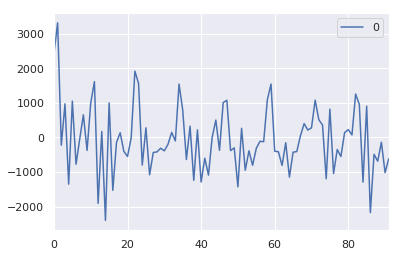

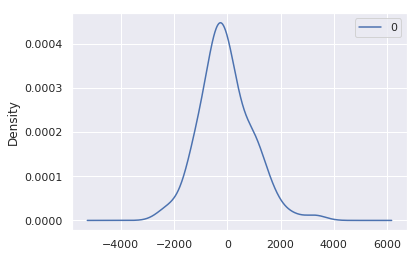

                 0
count    92.000000
mean    -53.983410
std     971.471511
min   -2400.337412
25%    -603.753347
50%    -150.254335
75%     423.827496
max    3316.930434


In [58]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

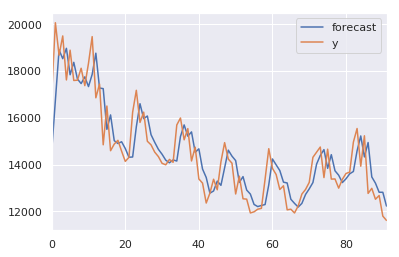

In [59]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [60]:
from statsmodels.tsa.stattools import acf
train = MontlyBurglary[:85]
test = MontlyBurglary[85:]

In [61]:
model = ARIMA(train, order=(11, 2, 1))  
fitted = model.fit(disp=-1)
print(fitted.summary())
fc, se, conf = fitted.forecast(7, alpha=0.05)  # 95% conf
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

/home/student/Anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/student/Anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/home/student/Anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                ARIMA Model Results                                
Dep. Variable:     D2.number_of_burglaries   No. Observations:                   83
Model:                     ARIMA(11, 2, 1)   Log Likelihood                -658.914
Method:                            css-mle   S.D. of innovations            628.899
Date:                     Mon, 20 Jan 2020   AIC                           1345.828
Time:                             13:01:23   BIC                           1379.692
Sample:                         02-01-2011   HQIC                          1359.433
                              - 12-01-2017                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              2.5509      3.544      0.720      0.474      -4.395       9.497
ar.L1.D2.number_of_burglaries  

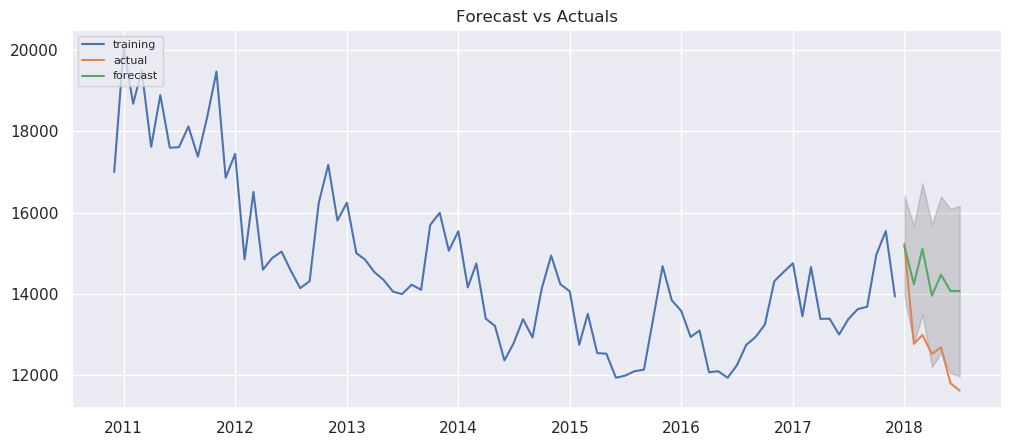

In [62]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [63]:
#Time series done for number of burglaries and all years and months

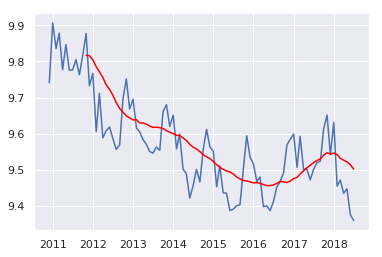

In [64]:
ts = MontlyBurglary
ts_log = np.log(ts)
plt.plot(ts_log)

moving_avg = ts_log.rolling(12).mean()
plt.plot(moving_avg, color='red')

ts_log_moving_avg_diff = ts_log - moving_avg 
ts_log_moving_avg_diff.head(12)

ts_log_moving_avg_diff.dropna(inplace=True)

In [65]:
MontlyBurglary.to_frame()

,number_of_burglaries
Year_Month,
2010-12-01,17000
2011-01-01,20065
2011-02-01,18679
2011-03-01,19501
2011-04-01,17621
2011-05-01,18893
2011-06-01,17598
2011-07-01,17610
2011-08-01,18120


In [66]:
MontlyBurglaryGrouped = MontlyBurglary.groupby(pd.Grouper(freq='A'))

In [67]:
burglaryDF = pd.DataFrame()

for name, group in MontlyBurglaryGrouped:
    if len(group.values) == 12:
        try:
            burglaryDF[name.year] = group.values
        except:
            pass
        
burglaryDF

,2011,2012,2013,2014,2015,2016,2017
0,20065,17447,16244,15541,14062,13580,14753
1,18679,14849,15000,14158,12747,12939,13448
2,19501,16506,14847,14747,13508,13097,14661
3,17621,14596,14536,13387,12541,12069,13383
4,18893,14879,14344,13211,12526,12096,13389
5,17598,15041,14056,12360,11936,11935,12997
6,17610,14576,13994,12782,11985,12237,13374
7,18120,14139,14225,13377,12096,12743,13623
8,17377,14312,14101,12926,12133,12941,13682
9,18333,16243,15697,14124,13381,13244,14963


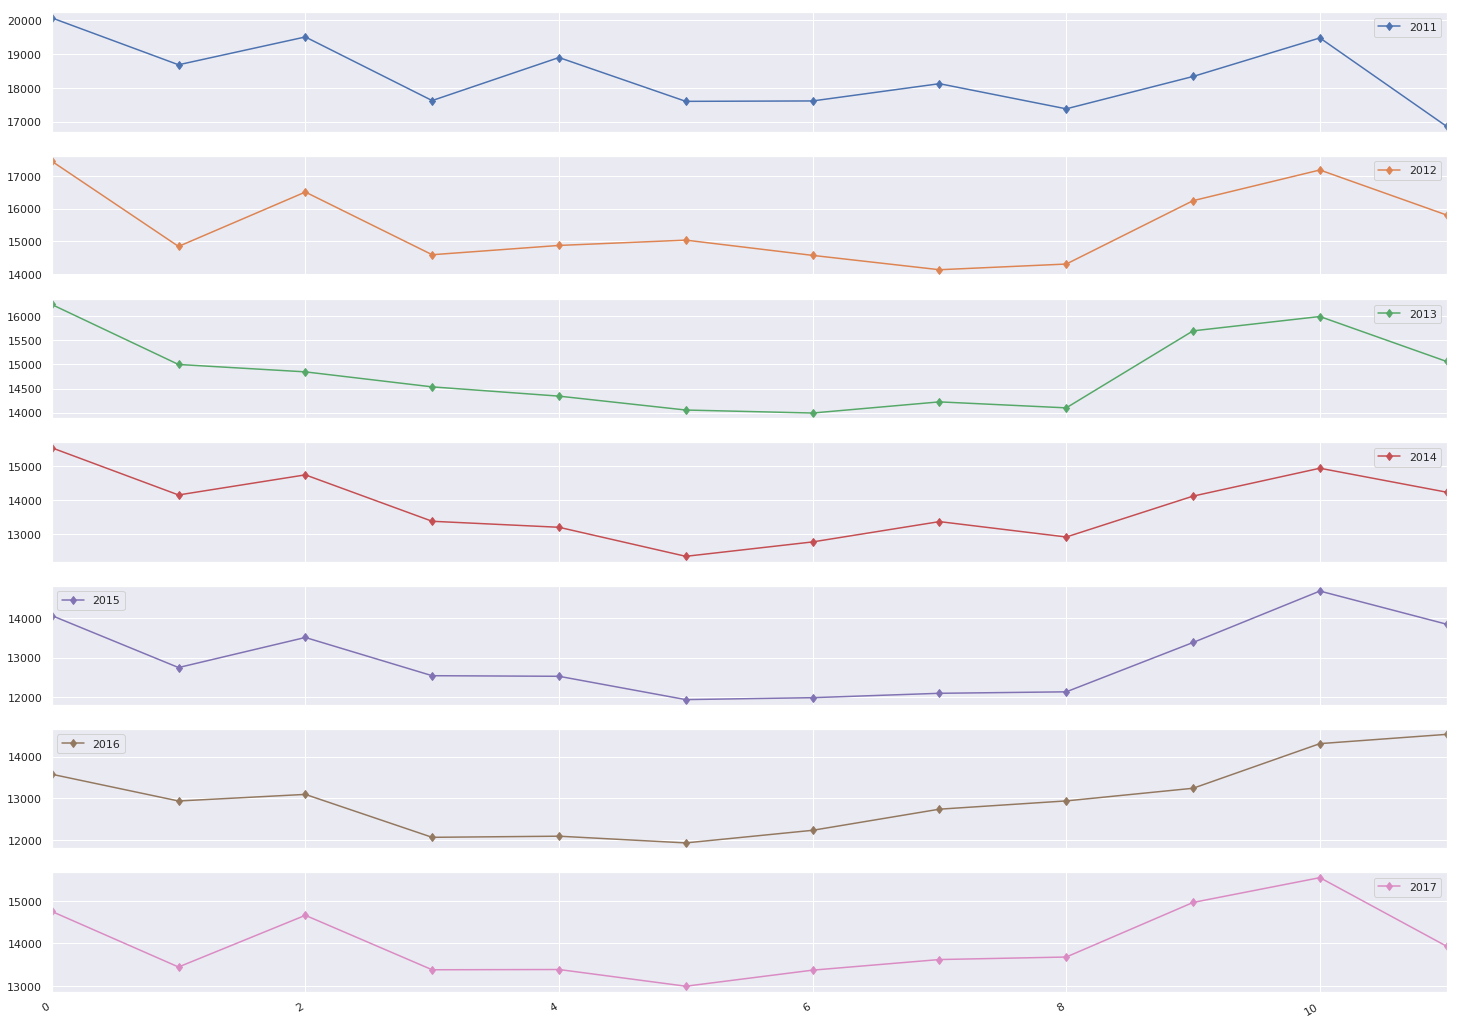

In [69]:
burglaryDF.plot(subplots=True, marker='d',  legend=True ,figsize=[25,20])
plt.show()